# Machine Learning analysis of NYC AirBnb Data

### Description:
This is an analysis used for a a general workshop. This notebook covers data exploration, data pipelines and machine learning analysis. 

# Code

### Import packages

In [2]:
%load_ext autoreload
%autoreload 2
from utils import *
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
pd.set_option('display.max_columns', None)

/home/nrs/TriforkProjects/environments/IP-TestDay/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


We set the random seeds for reproducability

In [3]:
np.random.seed(RANDOM_STATE)

### Import data
import data via CSV file into a pandas dataframe

In [4]:
df = importDataCSV('NYC_AIRBNB_NanClean.csv')

## (1) Data overview 

In [5]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of observations: {}'.format(df.shape[0]))

Number of features: 29
Number of observations: 50376


In [6]:
df.head(2)

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Manhattan,Apartment,Entire home/apt,1,1.000,0.000,1.000,Real Bed,225.000,350.000,95.000,1,0.000,10,1125,10,10,1125,1125,10.000,1125.000,48,9.000,9.000,10.000,10.000,10.000,9.000,0.390
1,Brooklyn,Guest suite,Entire home/apt,3,1.000,1.000,4.000,Real Bed,89.000,500.000,0.000,1,0.000,1,730,1,1,730,730,1.000,730.000,295,9.000,9.000,10.000,9.000,10.000,9.000,4.670


## Pipeline

In [7]:
class Pipeline():
    
    def __init__(self, df_uc):
        """Constructor"""
        #initiate all columns to be dropped
        self.drop_cols = []
        
        #Convert datatypes
        self.df = self.convertDtypes(df_uc)
          
        #Split for validation
        self.splitDataset()
        
        
        #Encode categoricals
        self.encodeCategoricals()
    
        
    def encodeCategoricals(self):
        #Create dummy variables - One hot encoding as we have categorical and not ordinal data - only from training data
        encode_cols = self.df_train.select_dtypes(include=['category']).columns.tolist()

        oh = OneHotEncoder(handle_unknown='ignore')
        enc_train =oh.fit_transform(self.df_train[encode_cols]).toarray()
        enc_test =oh.transform(self.df_test[encode_cols]).toarray()

        feature_labels = oh.categories_
        feature_labels = np.concatenate(feature_labels).ravel()

        enc_df_train = pd.DataFrame(enc_train, columns=feature_labels)
        enc_df_test = pd.DataFrame(enc_test, columns=feature_labels)

        self.df_train = self.df_train.join(enc_df_train)
        self.df_test = self.df_test.join(enc_df_test)
        
        
        self.dummy_vars = feature_labels
        self.drop_cols.extend(encode_cols)
        
    
    def splitDataset(self):
        df_train, df_test = train_test_split(self.df, test_size=0.3, random_state=RANDOM_STATE)
        del self.df

        #Reseting index for clear mapping
        self.df_train = df_train.reset_index(drop=True)
        self.df_test = df_test.reset_index(drop=True)
    
        
    def convertDtypes(self, df_uc):
        df = df_uc.copy()
        df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')
        return df
    
        

In [8]:
pipeline = Pipeline(df)

In [9]:
df_train = pipeline.df_train
df_test = pipeline.df_test
df_train

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Aparthotel,Apartment,Bed and breakfast,Boat,Boutique hotel,Bungalow,Bus,Cabin,Camper/RV,Casa particular (Cuba),Castle,Cave,Condominium,Cottage,Dome house,Dorm,Earth house,Guest suite,Guesthouse,Hostel,Hotel,House,Houseboat,Island,Loft,Other,Resort,Serviced apartment,Tent,Tiny house,Townhouse,Villa,Entire home/apt,Hotel room,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,Brooklyn,Apartment,Entire home/apt,4,1.000,2.000,2.000,Real Bed,107.000,0.000,99.000,4,25.000,2,1125,2,2,1125,1125,2.000,1125.000,101,10.000,9.000,10.000,10.000,9.000,9.000,2.820,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,Manhattan,Apartment,Entire home/apt,2,1.000,1.000,1.000,Real Bed,198.000,100.000,75.000,1,0.000,3,30,3,3,30,30,3.000,30.000,58,10.000,10.000,10.000,10.000,10.000,10.000,1.610,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,Brooklyn,Apartment,Private room,2,1.000,1.000,1.000,Real Bed,85.000,0.000,0.000,1,0.000,4,40,4,4,40,40,4.000,40.000,0,5.000,5.000,5.000,5.000,5.000,5.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
3,Manhattan,Apartment,Shared room,1,1.000,1.000,1.000,Real Bed,49.000,0.000,20.000,1,0.000,3,30,3,3,30,30,3.000,30.000,122,10.000,9.000,10.000,10.000,10.000,9.000,4.420,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
4,Manhattan,Apartment,Entire home/apt,6,1.000,2.000,4.000,Real Bed,160.000,0.000,65.000,1,0.000,1,1125,1,1,1125,1125,1.000,1125.000,9,10.000,10.000,10.000,10.000,9.000,10.000,0.190,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35258,Brooklyn,Apartment,Private room,1,1.000,1.000,1.000,Real Bed,75.000,0.000,0.000,1,0.000,4,1125,4,4,1125,1125,4.000,1125.000,2,10.000,10.000,10.000,10.000,10.000,10.000,0.040,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
35259,Manhattan,Apartment,Entire home/ap

## Model selection (log_price as y) - Coding assignment

In [10]:
features_ms = [i for i in df_train.columns.tolist() if not 'price' in str(i) and not i in pipeline.drop_cols] #and not 'dm' in i]
features_ms

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'number_of_reviews',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'Bronx',
 'Brooklyn',
 'Manhattan',
 'Queens',
 'Staten Island',
 'Aparthotel',
 'Apartment',
 'Bed and breakfast',
 'Boat',
 'Boutique hotel',
 'Bungalow',
 'Bus',
 'Cabin',
 'Camper/RV',
 'Casa particular (Cuba)',
 'Castle',
 'Cave',
 'Condominium',
 'Cottage',
 'Dome house',
 'Dorm',
 'Earth house',
 'Guest suite',
 'Guesthouse',
 'Hostel',
 'Hotel',
 'House',
 'Houseboat',
 'Island',
 'Loft',
 'Other',
 'Resort',
 'Serviced apartment',
 'Tent',
 'Tiny h

### OLS

In [11]:
from scipy.special import inv_boxcox
def ptInvert(df, fitted_lambda):
    return inv_boxcox(df['y_pred_pt'], fitted_lambda)

In [12]:
dfy = df_train.copy().sample(frac=1, random_state=RANDOM_STATE)
dfy['intercept'] = 1

lr_cols = features_ms
X, y = dfy[lr_cols], dfy['price']
results = sm.OLS(y,X).fit()
print(results.summary())

dfy['y_pred'] = results.predict(X)
dfy['error'] = dfy['price'] - dfy['y_pred']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 04 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:54:45   Log-Likelihood:            -2.5436e+05
No. Observations:               35263   AIC:                         5.089e+05
Df Residuals:                   35196   BIC:                         5.094e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
accommodates      

##### Zero conditional mean

In [13]:
dfy[['error', 'y_pred']].cov()

,error,y_pred
error,107872.988,0.000
y_pred,0.000,21978.681


##### Error plot

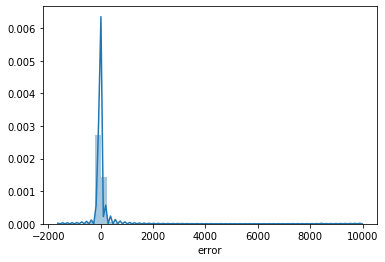

In [14]:
sns.distplot(dfy['error'])

##### Homoscedasticity

Lagrange multiplier statistic: 3749.18
p-value: 0.00
f-value: 63.44
f p-value: 0.00


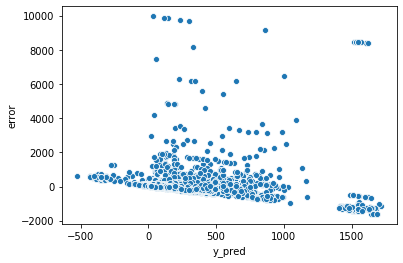

In [15]:
sns.scatterplot(data=dfy, y='error', x='y_pred')
test = sms.het_breuschpagan(dfy['error'], results.model.exog) #The null is homoscecdasticity
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
for i, j in zip(name, test):
    print('{0}: {1:.2f}'.format(i, j))
# lzip(name, test)

### Cross validation

#### K-fold

In [16]:
dfy = df_train.copy()
n_folds = 5
for Model in [LinearRegression(fit_intercept=True), RandomForestRegressor(), XGBRegressor(objective='reg:squarederror')]:
    if Model == XGBRegressor: 
        cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'), n_folds, dfy[features_ms], dfy['price'])
    else: 
        cv_res = rmse_cv(Model, n_folds, dfy[features_ms], dfy['price'])
        
    print('{}: {:.2f} +/- {:2f}'.format(Model.__class__.__name__, np.sqrt(-cv_res.mean()), np.sqrt(cv_res.std())))

del dfy

LinearRegression: 329.65 +/- 127.278080
RandomForestRegressor: 252.00 +/- 127.053393
XGBRegressor: 274.32 +/- 117.143228


#### Regular cross validation

In [78]:
for model in [LinearRegression(fit_intercept=True), RandomForestRegressor(), XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE)]:
    
    dfy = df_train.copy()
    dfy_test = df_test.copy()
    
    model.fit(dfy[features_ms], dfy['price'])
    dfy['y_pred'] = model.predict(dfy[features_ms])
    dfy_test['y_pred'] = model.predict(dfy_test[features_ms])
    
    print('\n-------------------------')
    
    print('\n{}\n\nTRAIN\nRMSE: {:.2f} - R² {:.3f}'.format(
        model.__class__.__name__, 
        np.sqrt(mean_squared_error(dfy['price'], dfy['y_pred'])), 
        r2_score(dfy['price'], dfy['y_pred'])))
    
    print('\nTEST\nRMSE: {:.2f} - R² {:.3f}'.format(
        np.sqrt(mean_squared_error(dfy_test['price'], dfy_test['y_pred'])), 
        r2_score(dfy_test['price'],  dfy_test['y_pred'])))

del dfy, dfy_test


-------------------------

LinearRegression

TRAIN
RMSE: 328.44 - R² 0.169

TEST
RMSE: 295.14 - R² 0.139

-------------------------

RandomForestRegressor

TRAIN
RMSE: 103.60 - R² 0.917

TEST
RMSE: 274.13 - R² 0.257

-------------------------

XGBRegressor

TRAIN
RMSE: 252.75 - R² 0.508

TEST
RMSE: 267.21 - R² 0.294
